# 课外作业-04 分析数据，解决问题    

 
<font color=red>能够进行数据采集，对数据进行筛选、过滤和分析。能够以文字和图形等形式对结果进行解释，科学地采用综合方法得到合理有效的结论。

第一题：某数据调查公司要对比一下不同购物平台的价格情况，现在模拟该过程。分别从京东、淘宝和拼多多上查找同一件商品的价格，商品型号自定（正式过程需要网络爬虫，本模拟只需网站查询即可），把数据拷贝存入文本文件（格式自定）。    
①按上述要求，查找3件同类的商品存入文件（不用写代码），给出文件内容。     
②写代码从文件读入数据，分析这3件商品在京东、淘宝和拼多多上的平均价格 ，用柱状图表示 。      
③就上述结果进行解释，科学地采用综合方法得到合理有效的结论。 

{'小米 13 Pro': 3269.0, '华硕天选4': 6497.333333333333, '创维65A3 Pro': 4365.666666666667, '海尔KFR-50LW': 5053.666666666667, ' EG100HMATE71S': 2535.3333333333335}


[]

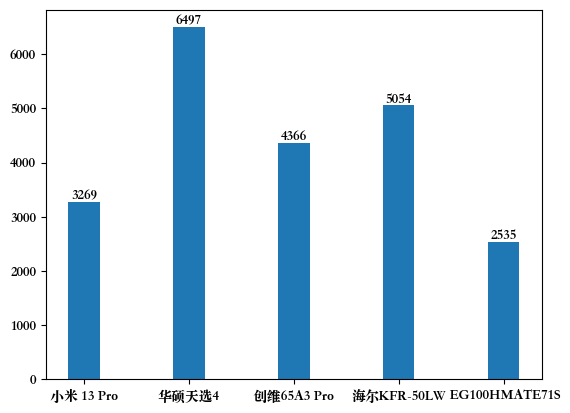

In [55]:
# data = open("data/data.txt", 'r+')
import pandas as pd
df = pd.read_excel("data/data.xlsx")
# data.head()

avg_list = {}
for row in df.itertuples():
    idx, name, jd, pdd, tb = row
    avg = (float(jd) + float(pdd) + float(tb)) / 3
    avg_list[name] = avg
    
print(avg_list)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Songti SC'
plt.xticks(fontsize=10)
plt.bar(avg_list.keys(), avg_list.values(), width=0.3)
# plt.text()

x = range(len(avg_list.keys()))

for i,j in zip(x, avg_list.values()):
    plt.text(i, j + 0.2, '%.0f'%j, ha='center', va='bottom')
plt.plot()




# title = next(data, None)
# print(title)

# avg_list = []

# for line in data:
#     print(line)
#     idx, name, jd, pdd, tb = line.split()
#     # avg = (float(jd) + float(pdd) + float(tb)) / 3
#     # avg_list.append(avg)

### 第二题:使用pandas进行数据分析

1.将数据集Euro2012_stats.csv存入的变量 euro12 

In [45]:
euro12 = pd.read_csv("data/Euro2012_stats.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


2.显示数据集的基本统计信息。输出多少行多少列

In [46]:
row, col = euro12.shape
print(f"This csv shape is {row} rows, {col} cols")

This csv shape is 16 rows, 35 cols


3.只选取 Goals 这一列显示

In [47]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


4.有多少球队参与了2012欧洲杯？

In [48]:
row

16

5.将数据集中的列Team, Yellow Cards和Red Cards单独存为一个名叫discipline的数据框

In [49]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


6.对数据框discipline按照先Red Cards再Yellow Cards进行排序

In [50]:
discipline.sort_values(by='Red Cards').sort_values(by='Yellow Cards')

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
11,Republic of Ireland,6,1
1,Czech Republic,7,0
14,Sweden,7,0


7.找到进球数Goals超过6的球队数据

In [51]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


8.选取以字母G开头的球队数据

In [52]:
def find_G_head(str):
    return [i[0:1] == 'G' for i in str]
euro12[find_G_head(euro12['Team'])]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


9.找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)

In [53]:
for i in ['England', 'Italy', 'Russia']:
    str = euro12.loc[euro12["Team"] == i]['Shooting Accuracy']
    print("The shooting Accurary of", i, "is", str.iloc(0)[0])

The shooting Accurary of England is 50.0%
The shooting Accurary of Italy is 43.0%
The shooting Accurary of Russia is 22.5%
